In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
import ast
df['job_skills'] = df.job_skills.apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

print(type(df.job_skills[1]))
df.info()

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 

In [2]:
# 1. Now I want to graph the top 10 most demanding skills.

In [3]:
def skstr(sklst) :
    if isinstance(sklst, list) :
        return str(sklst)
    else :
        return sklst

df['job_skills'] = df.job_skills.apply(skstr)

type(df.job_skills[1])

str

In [4]:
df.duplicated().any()

True

In [5]:
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785640 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785640 non-null  object        
 1   job_title              785639 non-null  object        
 2   job_location           784595 non-null  object        
 3   job_via                785632 non-null  object        
 4   job_schedule_type      772975 non-null  object        
 5   job_work_from_home     785640 non-null  bool          
 6   search_location        785640 non-null  object        
 7   job_posted_date        785640 non-null  datetime64[ns]
 8   job_no_degree_mention  785640 non-null  bool          
 9   job_health_insurance   785640 non-null  bool          
 10  job_country            785591 non-null  object        
 11  salary_rate            33066 non-null   object        
 12  salary_year_avg        22002 non-null   float64  

In [6]:
df['job_skills'] = df.job_skills.apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

In [7]:
df_og = df.copy()

In [8]:
df.dropna(subset="job_skills", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668654 entries, 1 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        668654 non-null  object        
 1   job_title              668654 non-null  object        
 2   job_location           667725 non-null  object        
 3   job_via                668646 non-null  object        
 4   job_schedule_type      658072 non-null  object        
 5   job_work_from_home     668654 non-null  bool          
 6   search_location        668654 non-null  object        
 7   job_posted_date        668654 non-null  datetime64[ns]
 8   job_no_degree_mention  668654 non-null  bool          
 9   job_health_insurance   668654 non-null  bool          
 10  job_country            668615 non-null  object        
 11  salary_rate            29800 non-null   object        
 12  salary_year_avg        20169 non-null   float64  

In [9]:
df_exploded = df.explode("job_skills")

df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


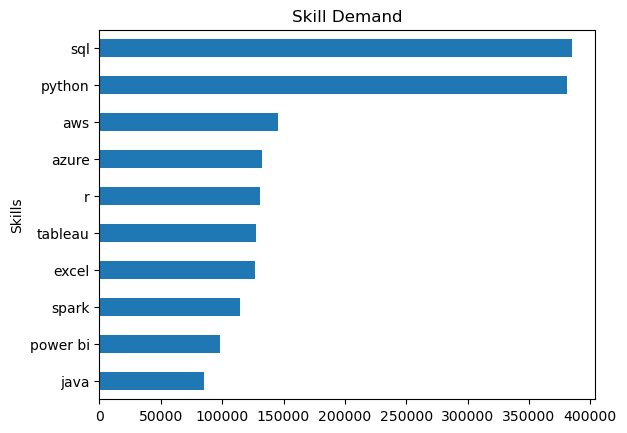

In [10]:
df_exploded.job_skills.value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.ylabel("Skills")
plt.title("Skill Demand")
plt.show()

In [11]:
# 2. want to plot top 10 skill demand graph for top 3 demading professions

In [12]:
top_3 = df_og.job_title_short.value_counts().sort_values(ascending=False).head(3).index.to_list()

In [30]:
df_q2 = df_exploded.pivot_table(index = "job_skills", columns = "job_title_short", aggfunc = "size")

df_q2

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_skills,,,,,,,,,,
airflow,318.0,260.0,2001.0,25503.0,3915.0,1164.0,596.0,8694.0,1403.0,1397.0
airtable,17.0,2.0,88.0,68.0,65.0,5.0,10.0,20.0,10.0,11.0
alteryx,1078.0,28.0,4570.0,2294.0,2068.0,61.0,1186.0,467.0,430.0,115.0
angular,87.0,138.0,376.0,1446.0,736.0,92.0,54.0,303.0,101.0,2020.0
angular.js,NaN,6.0,2.0,45.0,12.0,1.0,NaN,19.0,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...
wrike,4.0,1.0,39.0,6.0,8.0,NaN,10.0,NaN,1.0,4.0
wsl,NaN,NaN,16.0,16.0,31.0,3.0,1.0,2.0,14.0,13.0
xamarin,NaN,6.0,2.0,10.0,5.0,1.0,NaN,3.0,NaN,35.0


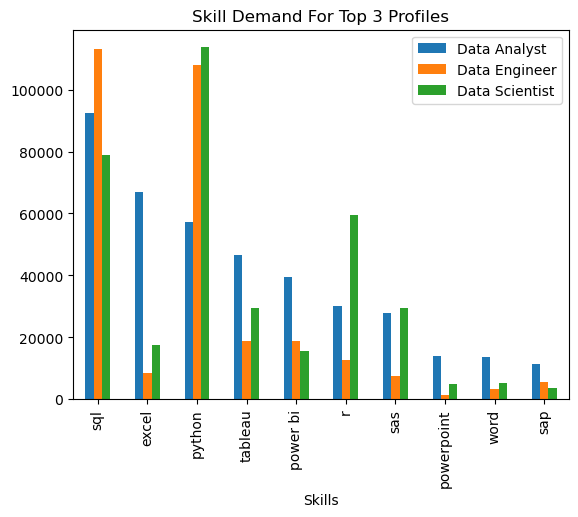

In [41]:
df_q2[top_3].sort_values(by = top_3, ascending=False).head(10).plot(kind="bar")
plt.xlabel("Skills")
plt.title("Skill Demand For Top 3 Profiles")
plt.legend()
plt.show()